## About Plotly.

Plotly is a Data Viz library by the company Plotly based out of Canada with support in languages such as Python, Js, Julia etc.

#### Advantages

- Multi language support
- Lot's of graphs
- Interactive plots
- Beautiful plots

Does not work with live data streams. Dash can be explored for that.

### The Plotly Roadmap

- Plotly Go
- Plotly Express
- Dash

### Image of Structure of Plotly.
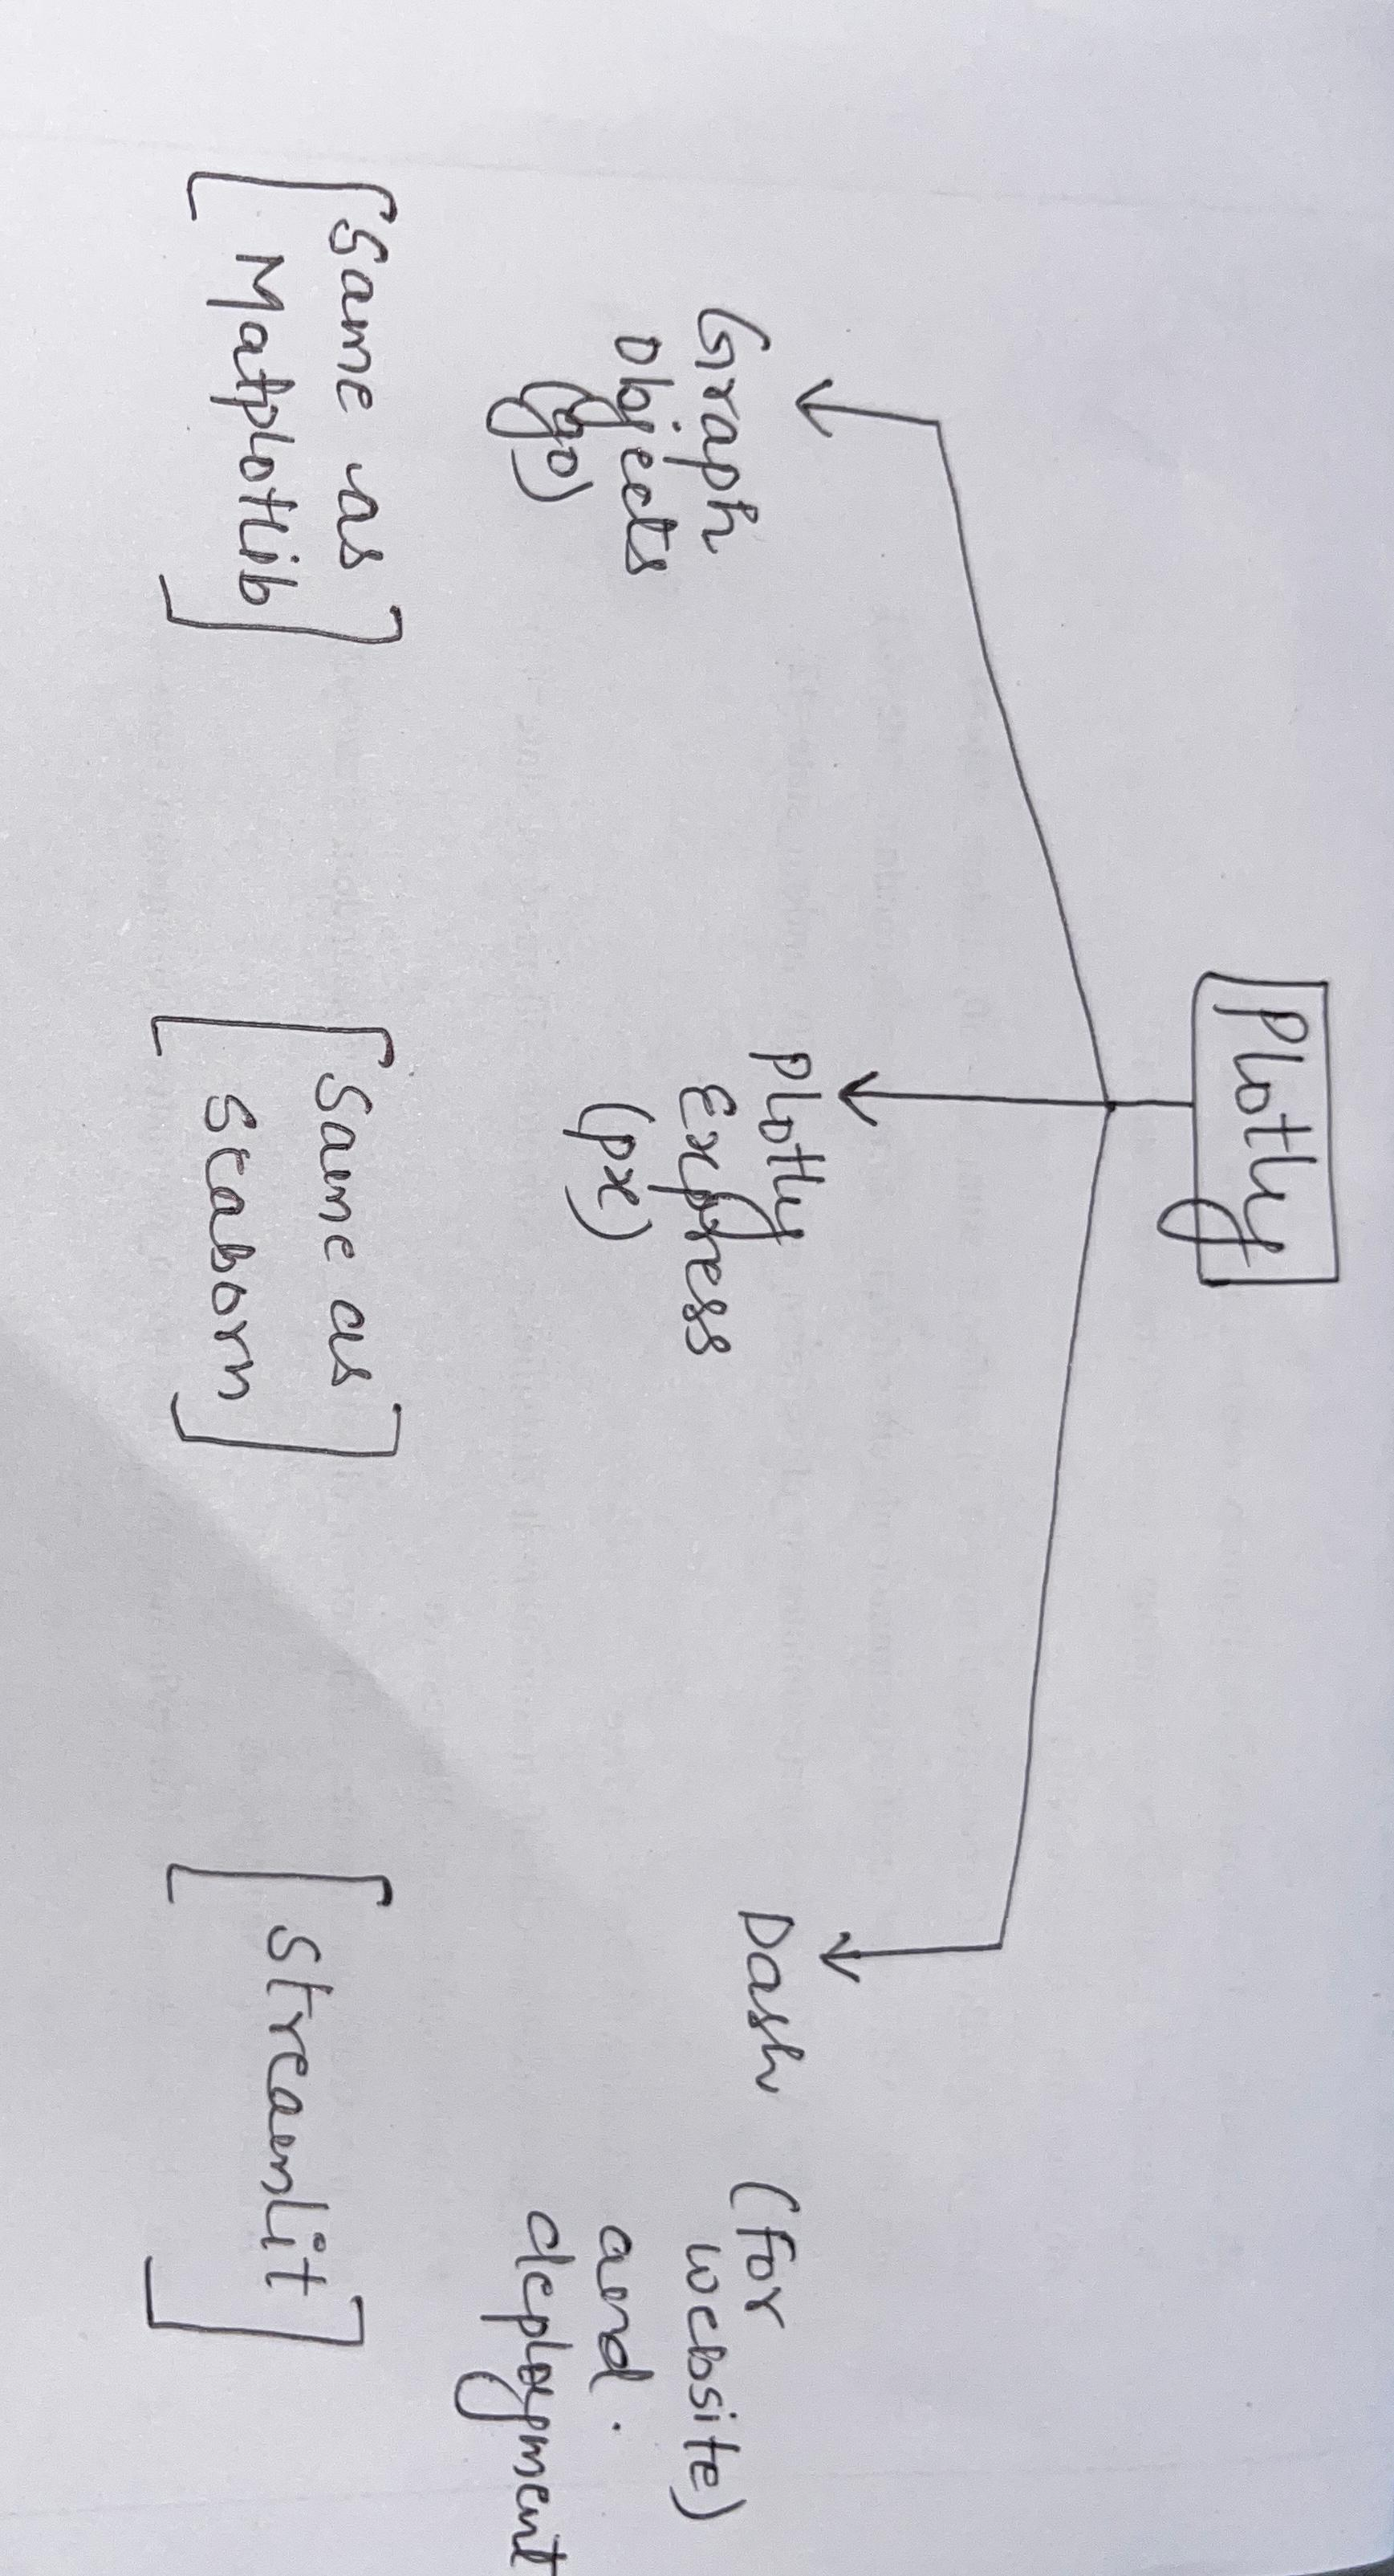

### Working with Plotly Go

In [1]:
# import the libaries. 
import plotly.graph_objects as go
import plotly.express as px 
import pandas as pd 
import numpy as np 

In [2]:
# import datasets. 
tips = px.data.tips()
iris = px.data.iris()
gapminder = px.data.gapminder()

In [3]:
gapminder.head()

country continent  year  lifeExp       pop   gdpPercap iso_alpha  \
0  Afghanistan      Asia  1952   28.801   8425333  779.445314       AFG   
1  Afghanistan      Asia  1957   30.332   9240934  820.853030       AFG   
2  Afghanistan      Asia  1962   31.997  10267083  853.100710       AFG   
3  Afghanistan      Asia  1967   34.020  11537966  836.197138       AFG   
4  Afghanistan      Asia  1972   36.088  13079460  739.981106       AFG   

   iso_num  
0        4  
1        4  
2        4  
3        4  
4        4

#### Scatter plot using plotly go and then plotly express. 

In [5]:
# this scatter plot for 2007 year only. 
temp_df = gapminder[gapminder['year'] == 2007]
temp_df

country continent  year  lifeExp       pop     gdpPercap  \
11           Afghanistan      Asia  2007   43.828  31889923    974.580338   
23               Albania    Europe  2007   76.423   3600523   5937.029526   
35               Algeria    Africa  2007   72.301  33333216   6223.367465   
47                Angola    Africa  2007   42.731  12420476   4797.231267   
59             Argentina  Americas  2007   75.320  40301927  12779.379640   
...                  ...       ...   ...      ...       ...           ...   
1655             Vietnam      Asia  2007   74.249  85262356   2441.576404   
1667  West Bank and Gaza      Asia  2007   73.422   4018332   3025.349798   
1679         Yemen, Rep.      Asia  2007   62.698  22211743   2280.769906   
1691              Zambia    Africa  2007   42.384  11746035   1271.211593   
1703            Zimbabwe    Africa  2007   43.487  12311143    469.709298   

     iso_alpha  iso_num  
11         AFG        4  
23         ALB        8  
35         DZA       12  
47         AGO       24  
59         ARG       32  
...        ...      ...  
1655       VNM      704  
1667       PSE      275  
1679       YEM      887  
1691       ZMB      894  
1703       ZWE      716  

[142 rows x 8 columns]

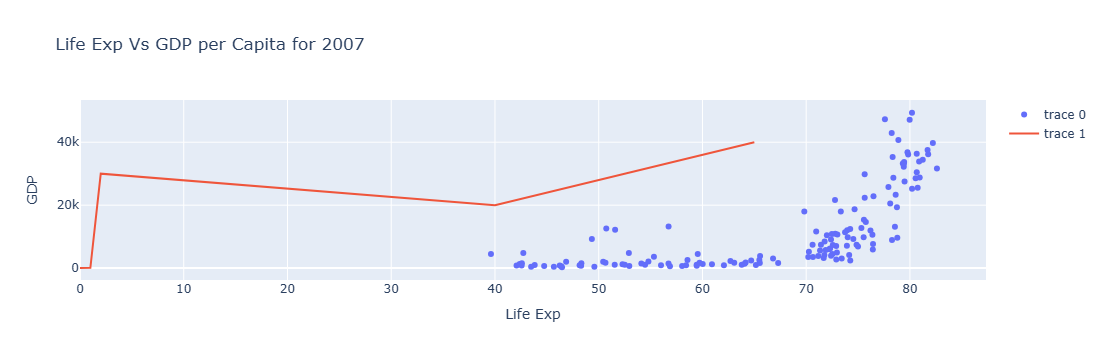

In [11]:
trace1 = go.Scatter(x=temp_df['lifeExp'],y=temp_df['gdpPercap'],mode='markers')
trace2 = go.Scatter(x=[0,1,2, 40, 65],y=[0,90,30000, 20000,40000],mode='lines')

data = [trace1, trace2]

layout = go.Layout(title='Life Exp Vs GDP per Capita for 2007', xaxis={'title':'Life Exp'},yaxis={'title':'GDP'})
fig = go.Figure(data,layout)

fig.show()

In [12]:
# plot life exp and gdp scatter plot -> continent as color -> pop as size -> hover name -> range_x/range_y -> log_x/log_y. 

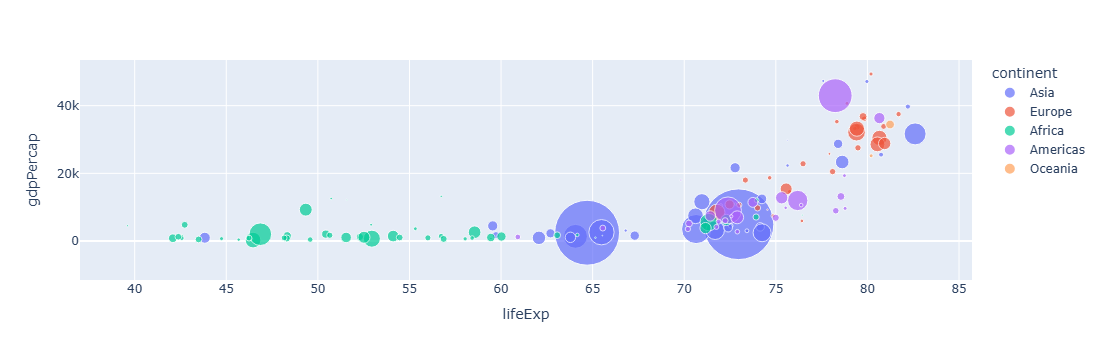

In [29]:
px.scatter(temp_df, x = 'lifeExp', y = 'gdpPercap', color='continent', size = 'pop', size_max=50, hover_name = 'country')

In [38]:
# Animated scatter plot for each year from 1952 to 2007. 
# plot animation of the above curve on the basic of year. 

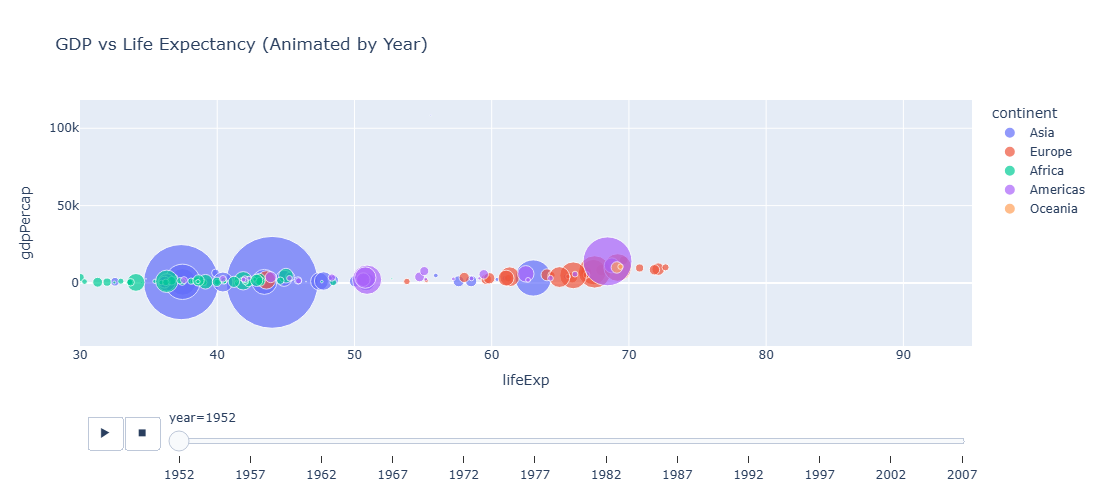

In [53]:
fig = px.scatter(gapminder, x = 'lifeExp', y = 'gdpPercap', 
                 animation_frame = 'year', animation_group = 'country', 
                 color='continent', size = 'pop', 
                 size_max = 100, hover_name = 'country', 
                 range_x = [30, 95], 
                 width = 1000, height = 500, 
                 title = 'GDP vs Life Expectancy (Animated by Year)')

fig.show()

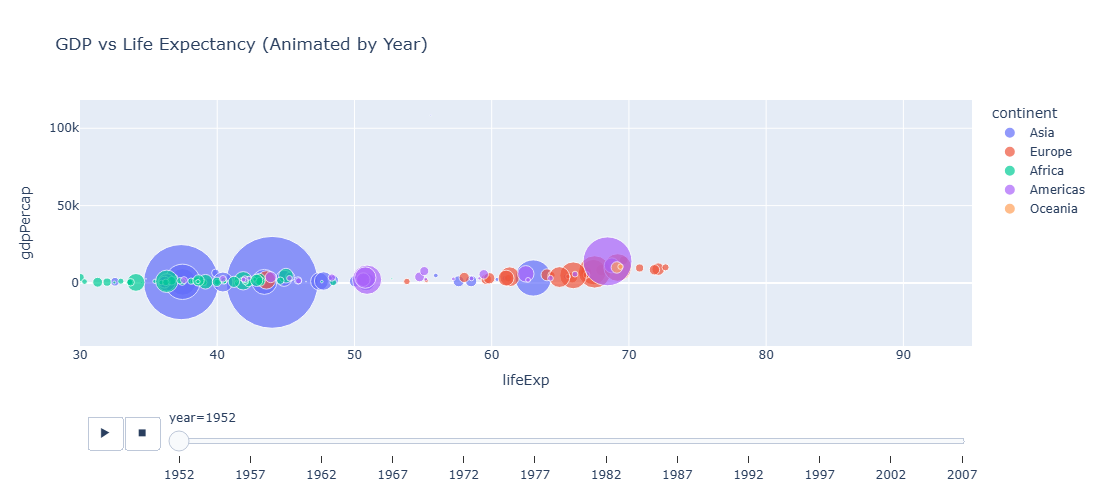

In [56]:
fig = px.scatter(gapminder, x = 'lifeExp', y = 'gdpPercap', 
                 animation_frame = 'year', animation_group = 'country', 
                 color='continent', size = 'pop', 
                 size_max = 100, hover_name = 'country', 
                 range_x = [30, 95], 
                 title = 'GDP vs Life Expectancy (Animated by Year)')

fig.update_layout(width=1000, height=500)

fig.show()

#### line plot

In [59]:
# plot india pop line plot. 
india_df = gapminder[gapminder['country'] == 'India']
india_df

country continent  year  lifeExp         pop    gdpPercap iso_alpha  \
696   India      Asia  1952   37.373   372000000   546.565749       IND   
697   India      Asia  1957   40.249   409000000   590.061996       IND   
698   India      Asia  1962   43.605   454000000   658.347151       IND   
699   India      Asia  1967   47.193   506000000   700.770611       IND   
700   India      Asia  1972   50.651   567000000   724.032527       IND   
701   India      Asia  1977   54.208   634000000   813.337323       IND   
702   India      Asia  1982   56.596   708000000   855.723538       IND   
703   India      Asia  1987   58.553   788000000   976.512676       IND   
704   India      Asia  1992   60.223   872000000  1164.406809       IND   
705   India      Asia  1997   61.765   959000000  1458.817442       IND   
706   India      Asia  2002   62.879  1034172547  1746.769454       IND   
707   India      Asia  2007   64.698  1110396331  2452.210407       IND   

     iso_num  
696      356  
697      356  
698      356  
699      356  
700      356  
701      356  
702      356  
703      356  
704      356  
705      356  
706      356  
707      356

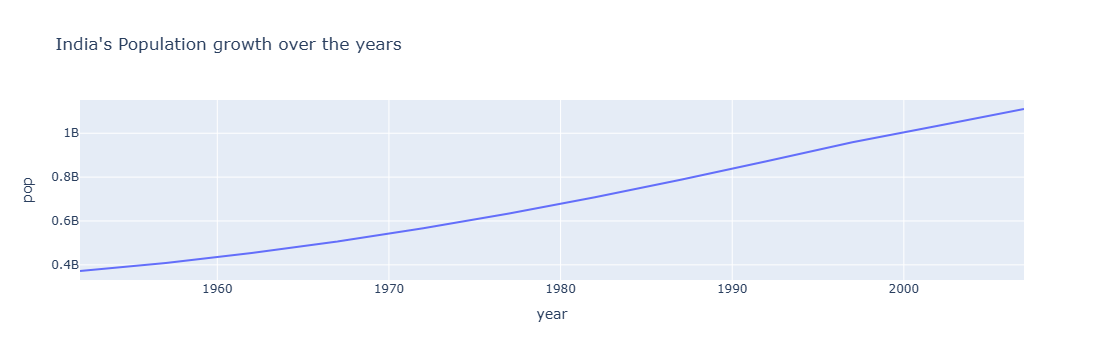

In [65]:
px.line(india_df, x = 'year', y = 'pop', title = "India's Population growth over the years")

In [77]:
# plot india china pak line plot. 
temp_df = gapminder[gapminder['country'].isin(['India', 'Pakistan', 'China'])]
temp_df = temp_df[['country', 'lifeExp', 'year']].pivot(index = 'year', columns = 'country', values = 'lifeExp')

In [78]:
temp_df

country     China   India  Pakistan
year                               
1952     44.00000  37.373    43.436
1957     50.54896  40.249    45.557
1962     44.50136  43.605    47.670
1967     58.38112  47.193    49.800
1972     63.11888  50.651    51.929
1977     63.96736  54.208    54.043
1982     65.52500  56.596    56.158
1987     67.27400  58.553    58.245
1992     68.69000  60.223    60.838
1997     70.42600  61.765    61.818
2002     72.02800  62.879    63.610
2007     72.96100  64.698    65.483

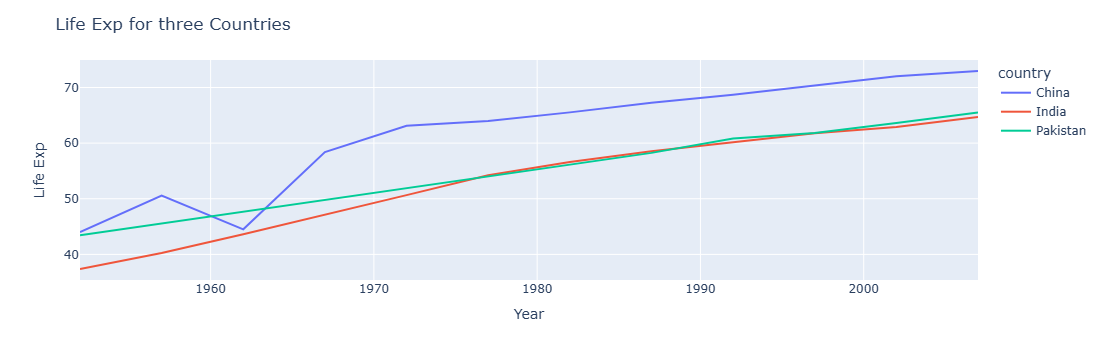

In [83]:
fig = px.line(temp_df, x = temp_df.index, y = temp_df.columns)

fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Life Exp",
    title='Life Exp for three Countries'
)

fig.show()

#### bar chart

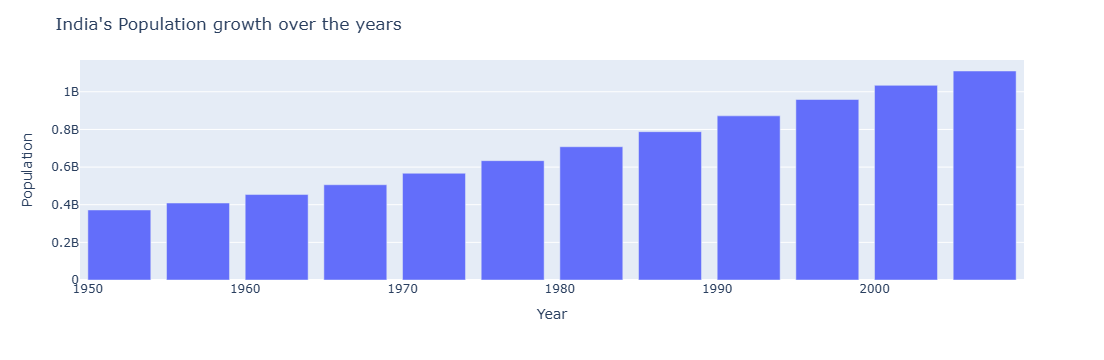

In [96]:
# india's pop over the years. 
temp_df = gapminder[gapminder['country'] == 'India'] 
fig = px.bar(temp_df, x = 'year', y = 'pop')

fig.update_layout(
    xaxis_title = "Year", 
    yaxis_title = "Population", 
    title = "India's Population growth over the years"
)

fig.show()

In [104]:
# pop comp of 3 countries. 
temp_df = gapminder[gapminder['country'].isin(['China', 'India', 'Pakistan'])]
temp_df = temp_df[['country', 'year', 'lifeExp']].pivot(index = 'year', columns = 'country', values = 'lifeExp')

temp_df

country     China   India  Pakistan
year                               
1952     44.00000  37.373    43.436
1957     50.54896  40.249    45.557
1962     44.50136  43.605    47.670
1967     58.38112  47.193    49.800
1972     63.11888  50.651    51.929
1977     63.96736  54.208    54.043
1982     65.52500  56.596    56.158
1987     67.27400  58.553    58.245
1992     68.69000  60.223    60.838
1997     70.42600  61.765    61.818
2002     72.02800  62.879    63.610
2007     72.96100  64.698    65.483

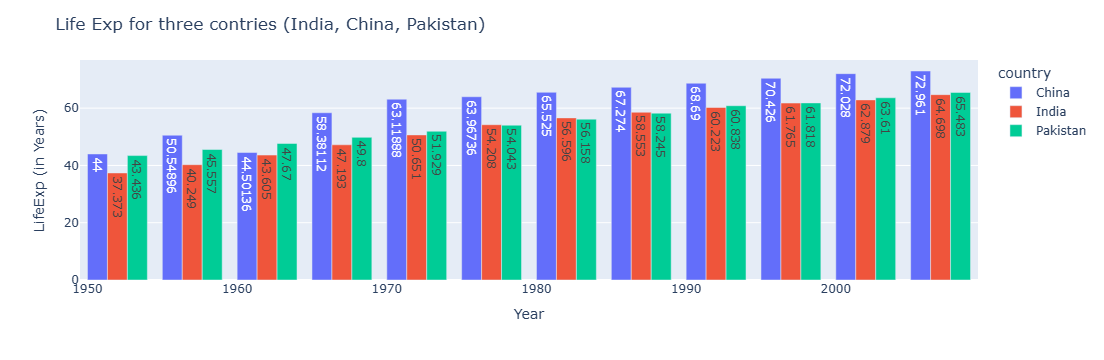

In [113]:
fig = px.bar(temp_df, x = temp_df.index, y = temp_df.columns, barmode='group', text_auto = True)

fig.update_layout(
    title = 'Life Exp for three contries (India, China, Pakistan)',
    xaxis_title = "Year", 
    yaxis_title = "LifeExp (in Years)"
)

fig.show()

In [115]:
# pop comp of 3 countries. 
temp_df = gapminder[gapminder['country'].isin(['China', 'India', 'Pakistan'])]
temp_df = temp_df[['country', 'year', 'pop']].pivot(index = 'year', columns = 'country', values = 'pop')

temp_df

country       China       India   Pakistan
year                                      
1952      556263527   372000000   41346560
1957      637408000   409000000   46679944
1962      665770000   454000000   53100671
1967      754550000   506000000   60641899
1972      862030000   567000000   69325921
1977      943455000   634000000   78152686
1982     1000281000   708000000   91462088
1987     1084035000   788000000  105186881
1992     1164970000   872000000  120065004
1997     1230075000   959000000  135564834
2002     1280400000  1034172547  153403524
2007     1318683096  1110396331  169270617

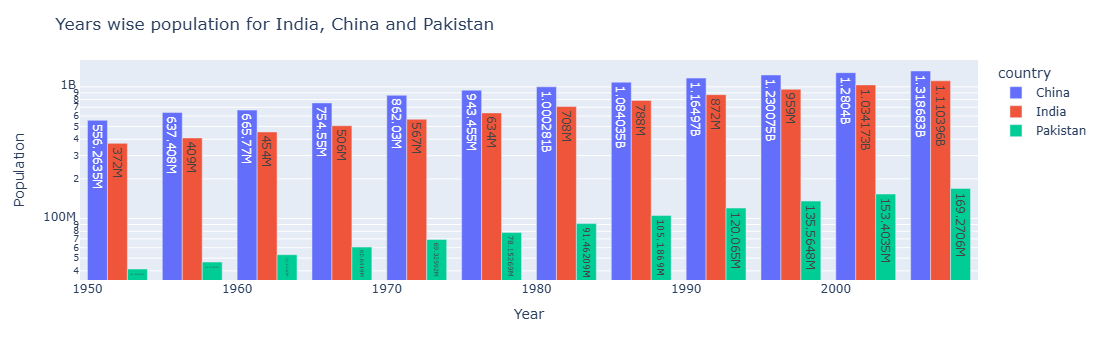

In [121]:
fig = px.bar(temp_df, x = temp_df.index, y = temp_df.columns, barmode='group', log_y=True, text_auto=True)

fig.update_layout(
    title = 'Years wise population for India, China and Pakistan', 
    xaxis_title = "Year", 
    yaxis_title = "Population"
)

fig.show()

In [124]:
# stacked bar chart
# pop contribution per country to a continents pop stacked for a particular year(2007). 
temp_df = gapminder[gapminder['year'] == 2007]
temp_df

country continent  year  lifeExp       pop     gdpPercap  \
11           Afghanistan      Asia  2007   43.828  31889923    974.580338   
23               Albania    Europe  2007   76.423   3600523   5937.029526   
35               Algeria    Africa  2007   72.301  33333216   6223.367465   
47                Angola    Africa  2007   42.731  12420476   4797.231267   
59             Argentina  Americas  2007   75.320  40301927  12779.379640   
...                  ...       ...   ...      ...       ...           ...   
1655             Vietnam      Asia  2007   74.249  85262356   2441.576404   
1667  West Bank and Gaza      Asia  2007   73.422   4018332   3025.349798   
1679         Yemen, Rep.      Asia  2007   62.698  22211743   2280.769906   
1691              Zambia    Africa  2007   42.384  11746035   1271.211593   
1703            Zimbabwe    Africa  2007   43.487  12311143    469.709298   

     iso_alpha  iso_num  
11         AFG        4  
23         ALB        8  
35         DZA       12  
47         AGO       24  
59         ARG       32  
...        ...      ...  
1655       VNM      704  
1667       PSE      275  
1679       YEM      887  
1691       ZMB      894  
1703       ZWE      716  

[142 rows x 8 columns]

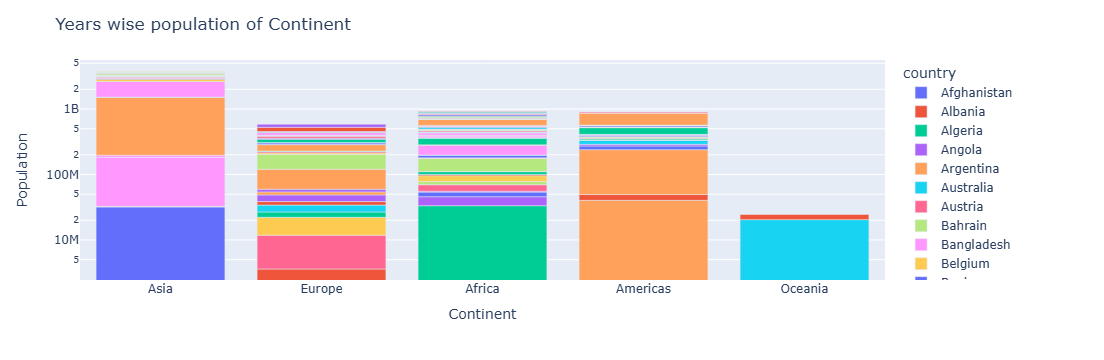

In [130]:
fig = px.bar(temp_df, x = 'continent', y = 'pop', color = 'country', log_y=True)

fig.update_layout(
    title = 'Years wise population of Continent', 
    xaxis_title = "Continent", 
    yaxis_title = "Population"
)

fig.show()

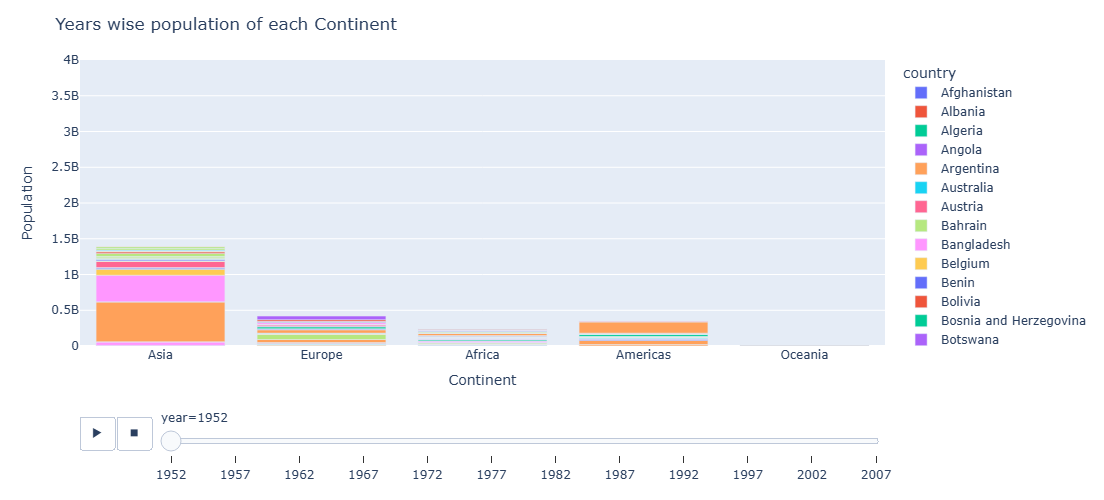

In [142]:
# Bar chart animation. 

fig = px.bar(gapminder, x = 'continent', y = 'pop', 
       color='country', animation_frame='year', 
       animation_group='country', range_y = [0, 4000000000], 
      )

fig.update_layout(
    title = 'Years wise population of each Continent', 
    xaxis_title = "Continent", 
    yaxis_title = "Population", 
    width = 1000, 
    height = 500
)

fig.show()

#### hist in plotly.

In [144]:
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

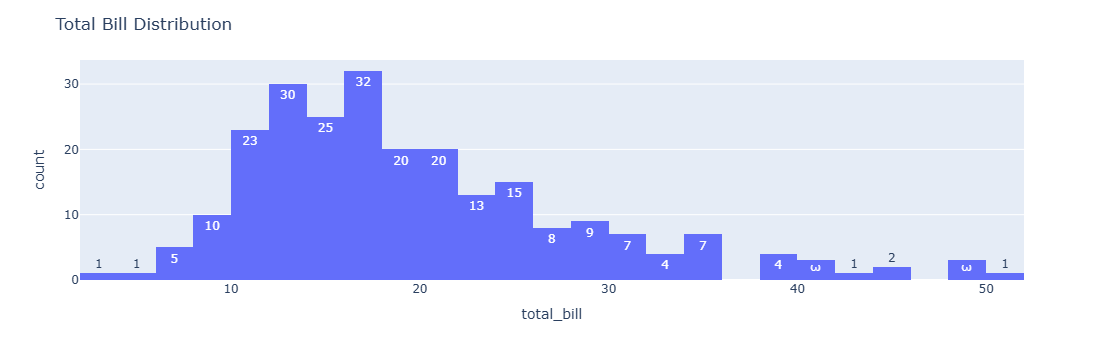

In [151]:
fig = px.histogram(tips, x = "total_bill", text_auto=True)

fig.update_layout(
    title='Total Bill Distribution',
)

fig.show()

In [153]:
temp_df = gapminder[gapminder['year'] == 2007]
temp_df

country continent  year  lifeExp       pop     gdpPercap  \
11           Afghanistan      Asia  2007   43.828  31889923    974.580338   
23               Albania    Europe  2007   76.423   3600523   5937.029526   
35               Algeria    Africa  2007   72.301  33333216   6223.367465   
47                Angola    Africa  2007   42.731  12420476   4797.231267   
59             Argentina  Americas  2007   75.320  40301927  12779.379640   
...                  ...       ...   ...      ...       ...           ...   
1655             Vietnam      Asia  2007   74.249  85262356   2441.576404   
1667  West Bank and Gaza      Asia  2007   73.422   4018332   3025.349798   
1679         Yemen, Rep.      Asia  2007   62.698  22211743   2280.769906   
1691              Zambia    Africa  2007   42.384  11746035   1271.211593   
1703            Zimbabwe    Africa  2007   43.487  12311143    469.709298   

     iso_alpha  iso_num  
11         AFG        4  
23         ALB        8  
35         DZA       12  
47         AGO       24  
59         ARG       32  
...        ...      ...  
1655       VNM      704  
1667       PSE      275  
1679       YEM      887  
1691       ZMB      894  
1703       ZWE      716  

[142 rows x 8 columns]

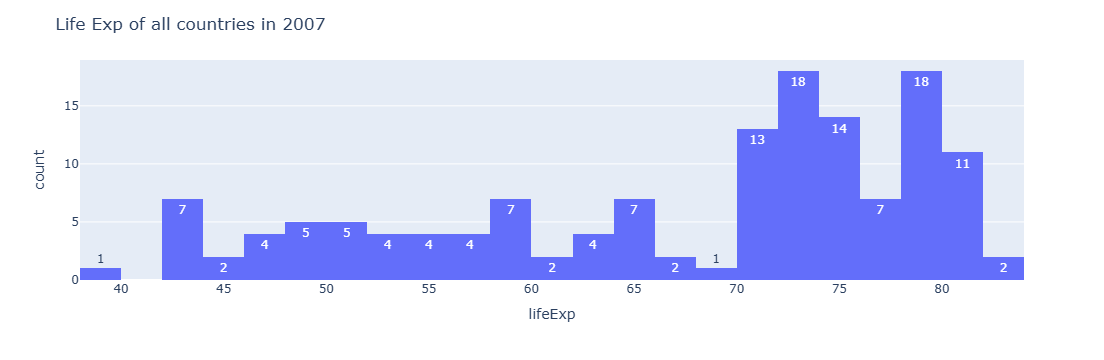

In [159]:
fig = px.histogram(temp_df, x = 'lifeExp', nbins=30, text_auto=True)
fig.update_layout(
    title='Life Exp of all countries in 2007',
)
fig.show()

In [161]:
# plot histogram of sepal length of all iris species. 
iris.head()

sepal_length  sepal_width  petal_length  petal_width species  species_id
0           5.1          3.5           1.4          0.2  setosa           1
1           4.9          3.0           1.4          0.2  setosa           1
2           4.7          3.2           1.3          0.2  setosa           1
3           4.6          3.1           1.5          0.2  setosa           1
4           5.0          3.6           1.4          0.2  setosa           1

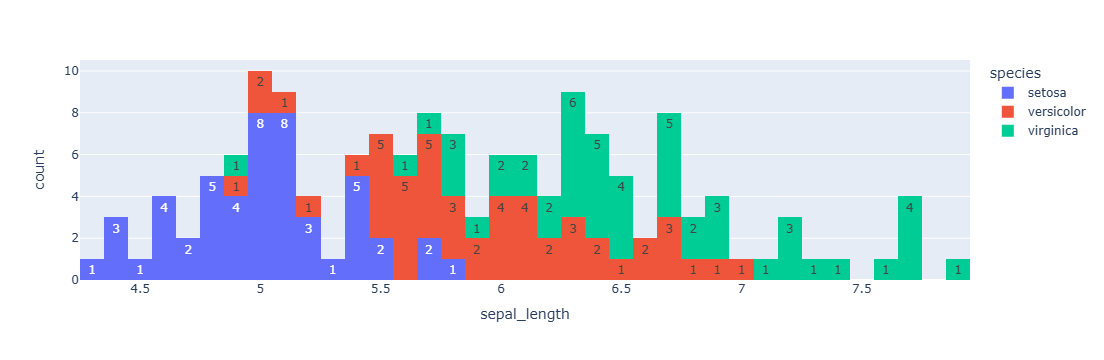

In [167]:
px.histogram(iris, x = 'sepal_length', nbins=40, color='species', text_auto=True)

#### Pie -> values -> names

In [170]:
# find the pie chart of pop of european countries in 2007. 
temp_df = gapminder[(gapminder['year'] == 2007) & (gapminder['continent'] == 'Europe')]
temp_df

country continent  year  lifeExp       pop     gdpPercap  \
23                   Albania    Europe  2007   76.423   3600523   5937.029526   
83                   Austria    Europe  2007   79.829   8199783  36126.492700   
119                  Belgium    Europe  2007   79.441  10392226  33692.605080   
155   Bosnia and Herzegovina    Europe  2007   74.852   4552198   7446.298803   
191                 Bulgaria    Europe  2007   73.005   7322858  10680.792820   
383                  Croatia    Europe  2007   75.748   4493312  14619.222720   
407           Czech Republic    Europe  2007   76.486  10228744  22833.308510   
419                  Denmark    Europe  2007   78.332   5468120  35278.418740   
527                  Finland    Europe  2007   79.313   5238460  33207.084400   
539                   France    Europe  2007   80.657  61083916  30470.016700   
575                  Germany    Europe  2007   79.406  82400996  32170.374420   
599                   Greece    Europe  2007   79.483  10706290  27538.411880   
683                  Hungary    Europe  2007   73.338   9956108  18008.944440   
695                  Iceland    Europe  2007   81.757    301931  36180.789190   
755                  Ireland    Europe  2007   78.885   4109086  40675.996350   
779                    Italy    Europe  2007   80.546  58147733  28569.719700   
1019              Montenegro    Europe  2007   74.543    684736   9253.896111   
1091             Netherlands    Europe  2007   79.762  16570613  36797.933320   
1151                  Norway    Europe  2007   80.196   4627926  49357.190170   
1235                  Poland    Europe  2007   75.563  38518241  15389.924680   
1247                Portugal    Europe  2007   78.098  10642836  20509.647770   
1283                 Romania    Europe  2007   72.476  22276056  10808.475610   
1343                  Serbia    Europe  2007   74.002  10150265   9786.534714   
1379         Slovak Republic    Europe  2007   74.663   5447502  18678.314350   
1391                Slovenia    Europe  2007   77.926   2009245  25768.257590   
1427                   Spain    Europe  2007   80.941  40448191  28821.063700   
1475                  Sweden    Europe  2007   80.884   9031088  33859.748350   
1487             Switzerland    Europe  2007   81.701   7554661  37506.419070   
1583                  Turkey    Europe  2007   71.777  71158647   8458.276384   
1607          United Kingdom    Europe  2007   79.425  60776238  33203.261280   

     iso_alpha  iso_num  
23         ALB        8  
83         AUT       40  
119        BEL       56  
155        BIH       70  
191        BGR      100  
383        HRV      191  
407        CZE      203  
419        DNK      208  
527        FIN      246  
539        FRA      250  
575        DEU      276  
599        GRC      300  
683        HUN      348  
695        ISL      352  
755        IRL      372  
779        ITA      380  
1019       MNE      499  
1091       NLD      528  
1151       NOR      578  
1235       POL      616  
1247       PRT      620  
1283       ROU      642  
1343       SRB      688  
1379       SVK      703  
1391       SVN      705  
1427       ESP      724  
1475       SWE      752  
1487       CHE      756  
1583       TUR      792  
1607       GBR      826

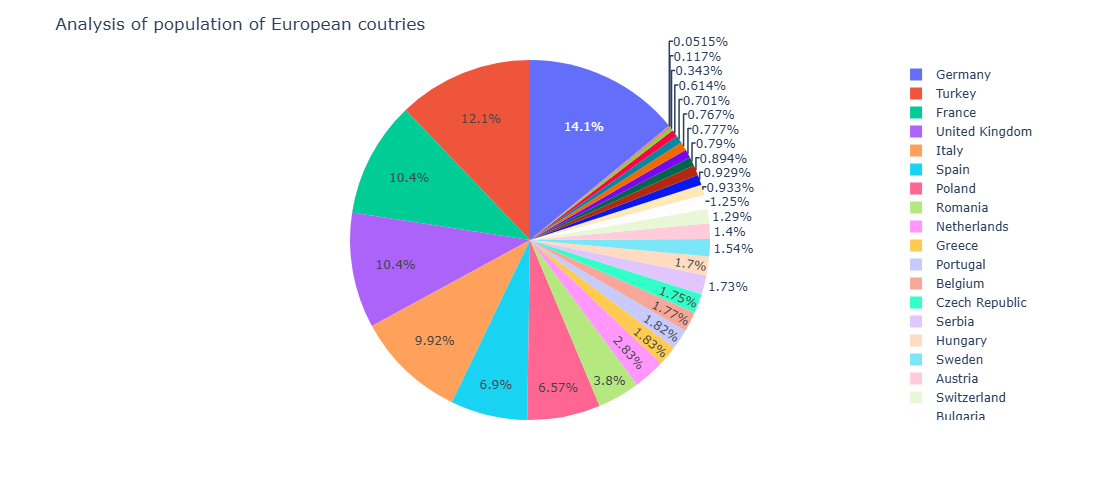

In [174]:
fig = px.pie(temp_df, values='pop', names='country')

fig.update_layout(
    title = "Analysis of population of European coutries ", 
    height = 500, 
)

fig.show() 

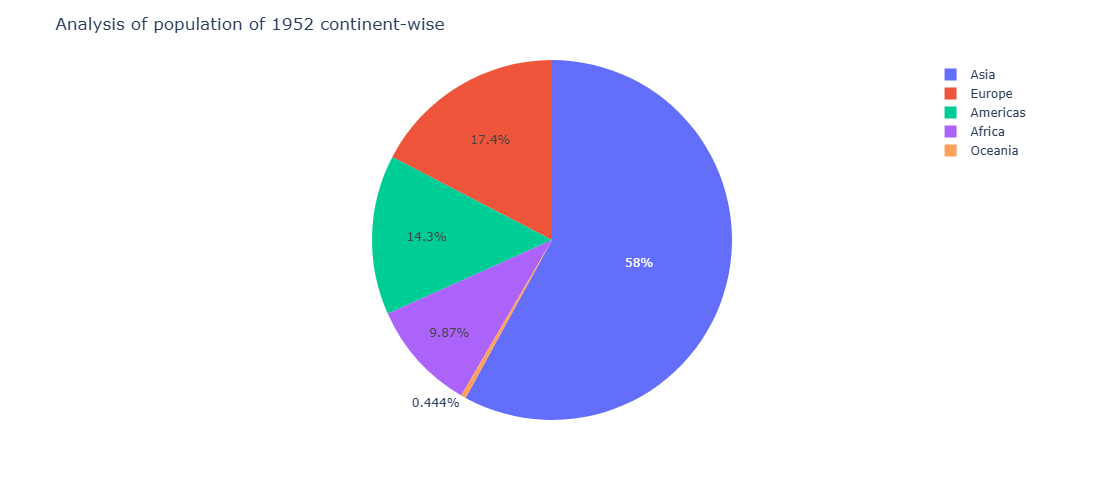

In [178]:
temp_df = gapminder[gapminder['year'] == 1952].groupby('continent')['pop'].sum().reset_index()


fig = px.pie(temp_df, values='pop', names='continent')

fig.update_layout(
    title = "Analysis of population of 1952 continent-wise ", 
    height = 500, 
)

fig.show()

#### Sunburst plot 

- Sunburst plots visualize hierarchical data spanning outwards radially from root to leaves.
-  color
- path -> [], values

In [181]:
temp_df = gapminder[gapminder['year'] == 1952]
temp_df

country continent  year  lifeExp       pop    gdpPercap  \
0            Afghanistan      Asia  1952   28.801   8425333   779.445314   
12               Albania    Europe  1952   55.230   1282697  1601.056136   
24               Algeria    Africa  1952   43.077   9279525  2449.008185   
36                Angola    Africa  1952   30.015   4232095  3520.610273   
48             Argentina  Americas  1952   62.485  17876956  5911.315053   
...                  ...       ...   ...      ...       ...          ...   
1644             Vietnam      Asia  1952   40.412  26246839   605.066492   
1656  West Bank and Gaza      Asia  1952   43.160   1030585  1515.592329   
1668         Yemen, Rep.      Asia  1952   32.548   4963829   781.717576   
1680              Zambia    Africa  1952   42.038   2672000  1147.388831   
1692            Zimbabwe    Africa  1952   48.451   3080907   406.884115   

     iso_alpha  iso_num  
0          AFG        4  
12         ALB        8  
24         DZA       12  
36         AGO       24  
48         ARG       32  
...        ...      ...  
1644       VNM      704  
1656       PSE      275  
1668       YEM      887  
1680       ZMB      894  
1692       ZWE      716  

[142 rows x 8 columns]

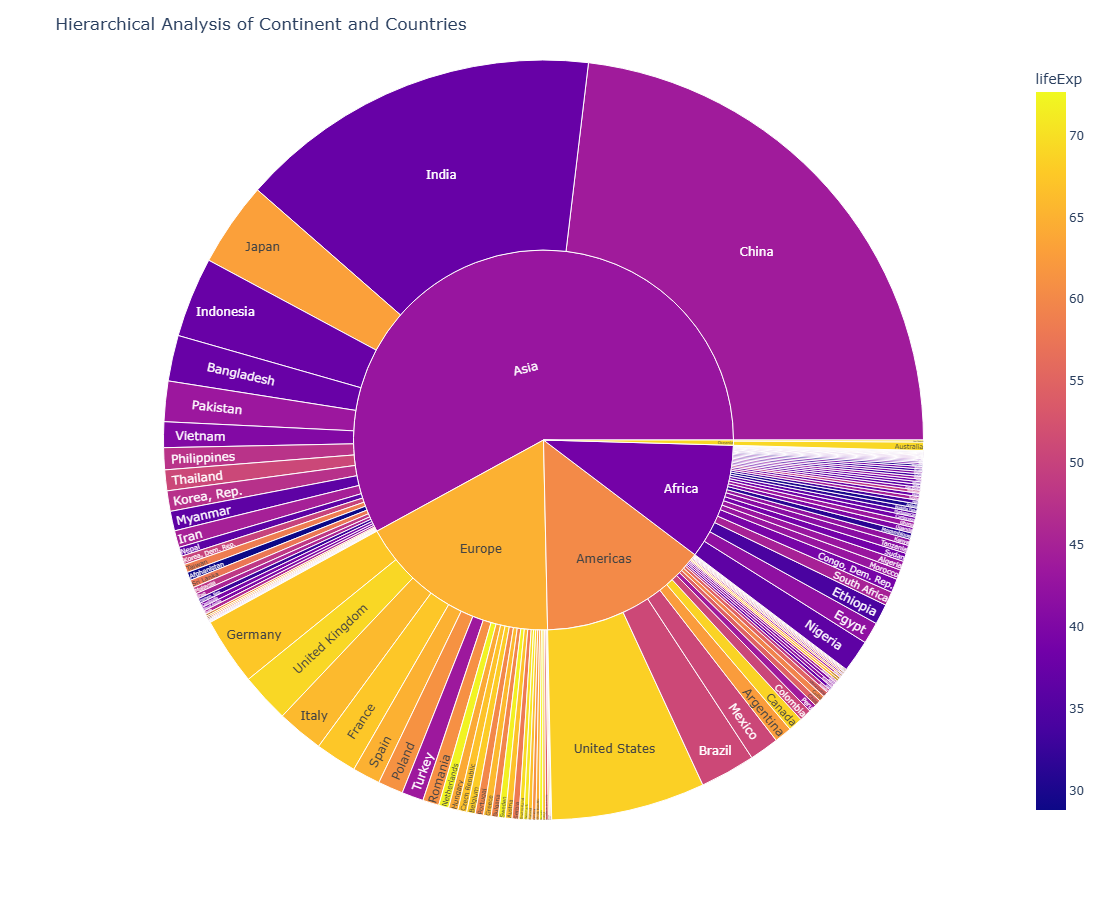

In [191]:
fig = px.sunburst(temp_df, path = ['continent', 'country'], values='pop', color='lifeExp')

fig.update_layout(
    title = "Hierarchical Analysis of Continent and Countries", 
    height = 900
)

fig.show() 

In [192]:
tips

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

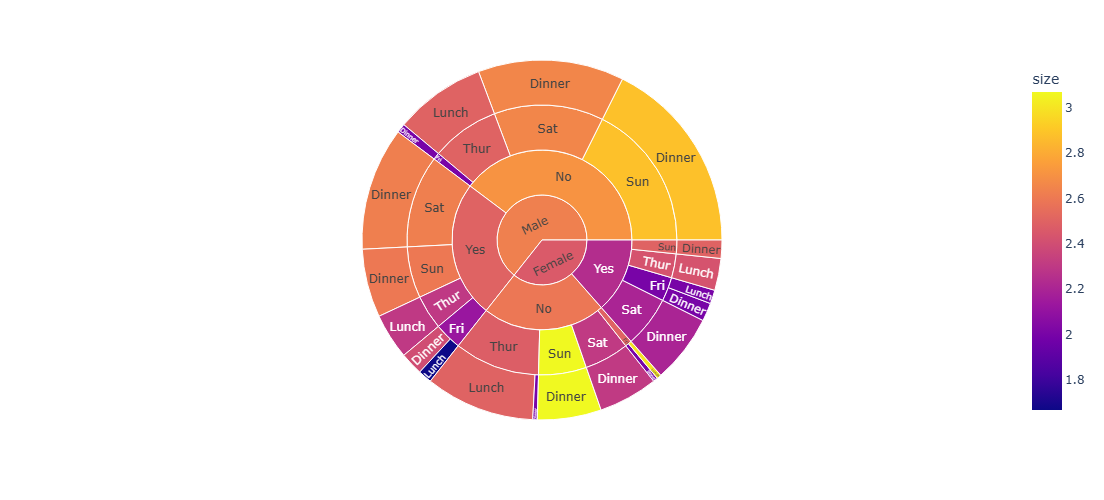

In [194]:
fig = px.sunburst(tips, path = ['sex', 'smoker', 'day', 'time'], color='size')

fig.update_layout(
    height = 500
)

fig.show() 

#### Treemap. 

In [198]:
temp_df = gapminder[gapminder['year'] == 2007]
temp_df

country continent  year  lifeExp       pop     gdpPercap  \
11           Afghanistan      Asia  2007   43.828  31889923    974.580338   
23               Albania    Europe  2007   76.423   3600523   5937.029526   
35               Algeria    Africa  2007   72.301  33333216   6223.367465   
47                Angola    Africa  2007   42.731  12420476   4797.231267   
59             Argentina  Americas  2007   75.320  40301927  12779.379640   
...                  ...       ...   ...      ...       ...           ...   
1655             Vietnam      Asia  2007   74.249  85262356   2441.576404   
1667  West Bank and Gaza      Asia  2007   73.422   4018332   3025.349798   
1679         Yemen, Rep.      Asia  2007   62.698  22211743   2280.769906   
1691              Zambia    Africa  2007   42.384  11746035   1271.211593   
1703            Zimbabwe    Africa  2007   43.487  12311143    469.709298   

     iso_alpha  iso_num  
11         AFG        4  
23         ALB        8  
35         DZA       12  
47         AGO       24  
59         ARG       32  
...        ...      ...  
1655       VNM      704  
1667       PSE      275  
1679       YEM      887  
1691       ZMB      894  
1703       ZWE      716  

[142 rows x 8 columns]

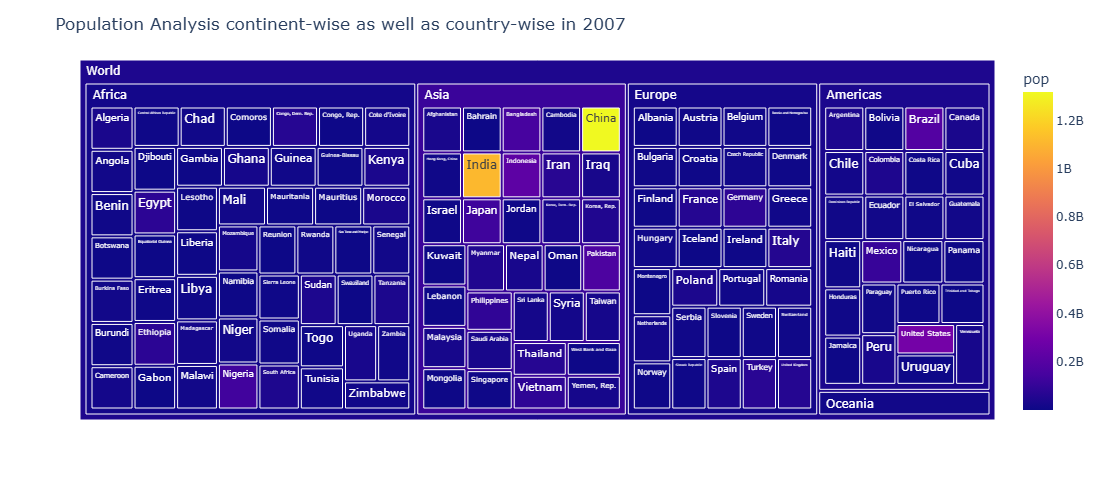

In [202]:
fig = px.treemap(temp_df, path = [px.Constant('World'), 'continent', 'country'], color = 'pop')

fig.update_layout(
    title = "Population Analysis continent-wise as well as country-wise in 2007", 
    height = 500
)

fig.show()

#### Heatmap.
- Show the relation between two columns on top of numerical values. 

In [205]:
temp_df = tips.pivot_table(index='day', columns='sex', values='size', aggfunc = 'sum')
temp_df

sex   Female  Male
day               
Fri       19    21
Sat       63   156
Sun       53   163
Thur      79    73

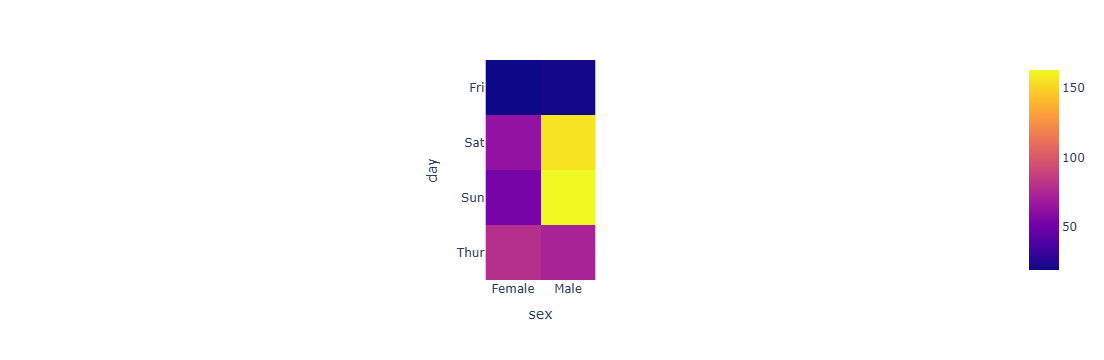

In [206]:
px.imshow(temp_df)

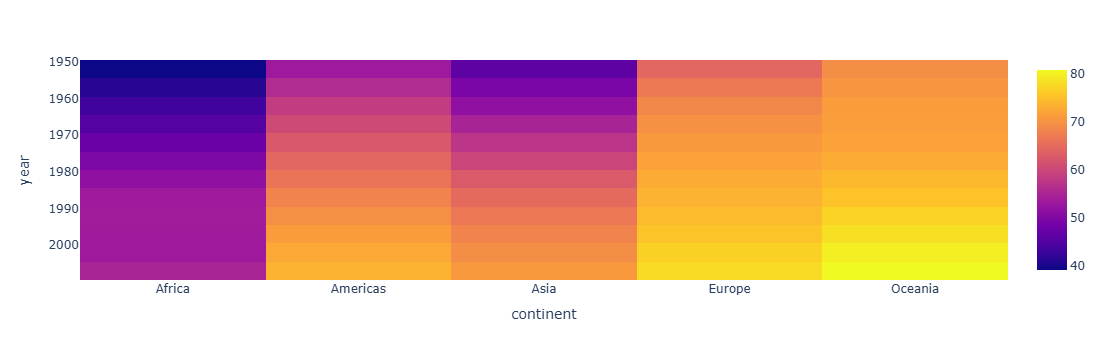

In [210]:
# Heatmap 
# -> find heatmap of all continents with year on avg life exp. 

temp_df = gapminder.pivot_table(index = 'year', columns = 'continent', values = 'lifeExp', aggfunc = 'mean')
px.imshow(temp_df)

#### 3d scatterplot. 

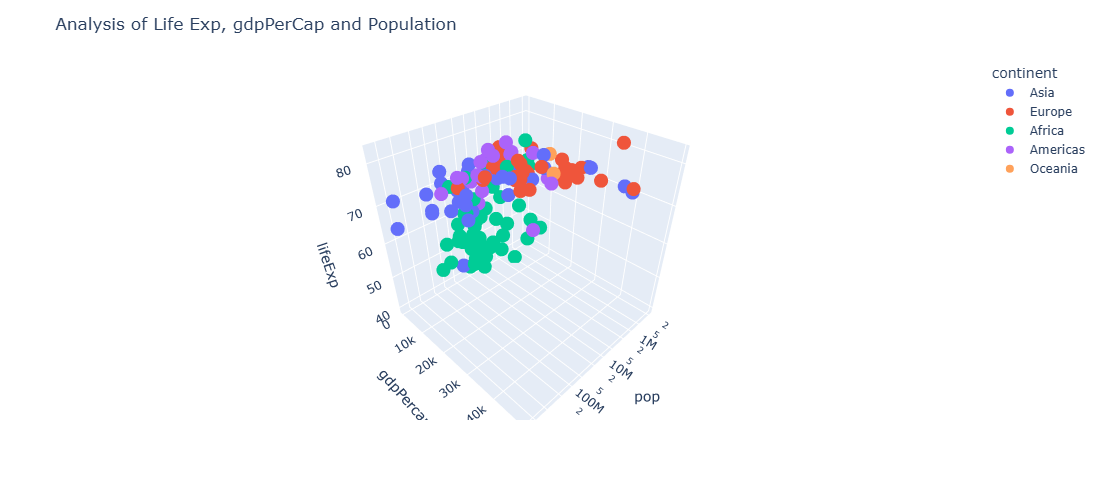

In [216]:
# plot a 3d scatter plot of all country data for 2007. 

temp_df = gapminder[gapminder['year'] == 2007]
fig = px.scatter_3d(temp_df, x = 'pop', y = 'gdpPercap', z = 'lifeExp', color = 'continent', log_x=True)

fig.update_layout(
    title = "Analysis of Life Exp, gdpPerCap and Population", 
    height = 500
)

fig.show()

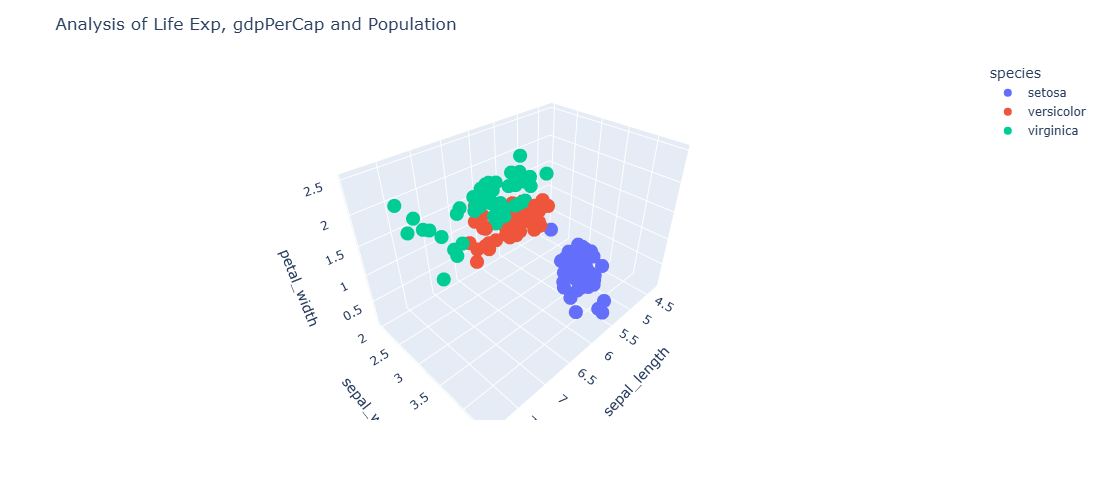

In [220]:
fig = px.scatter_3d(iris, x = 'sepal_length', y = 'sepal_width', z = 'petal_width', color = 'species')


fig.update_layout(
    title = "Analysis of Life Exp, gdpPerCap and Population", 
    height = 500
)

fig.show()

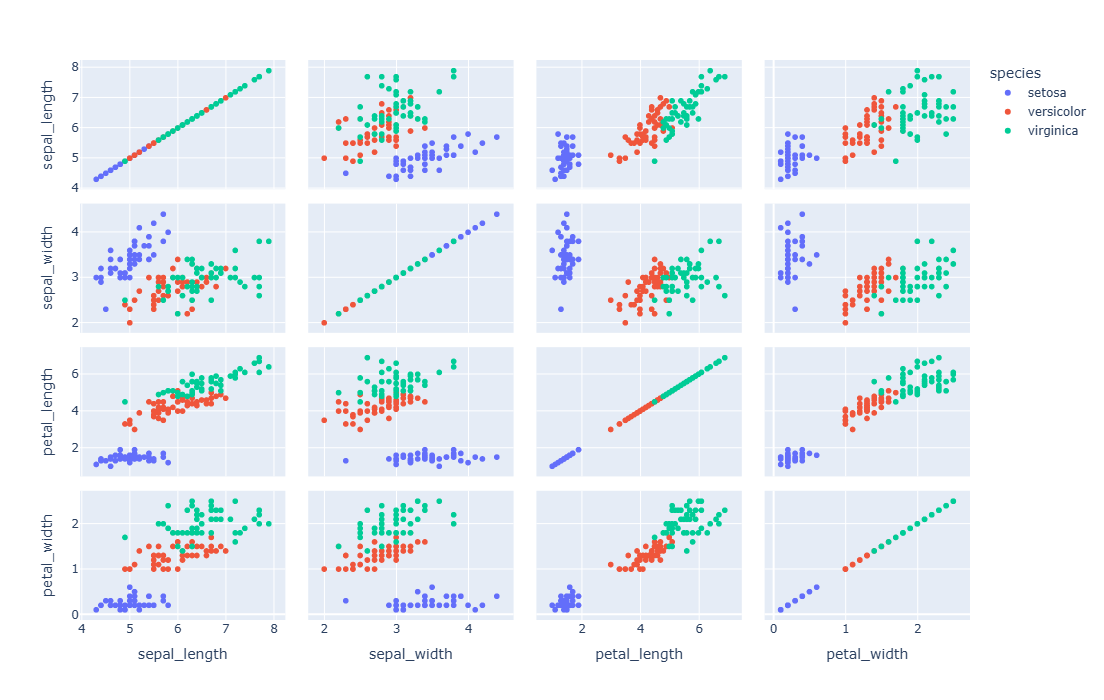

In [229]:
# scatter_matrix -> dimensions. 

fig = px.scatter_matrix(iris, dimensions = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], color = 'species')

fig.update_layout(
    height = 700, 
    width = 1100
)

fig.show()

#### facet plot

In [233]:
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [234]:
gapminder.head()

country continent  year  lifeExp       pop   gdpPercap iso_alpha  \
0  Afghanistan      Asia  1952   28.801   8425333  779.445314       AFG   
1  Afghanistan      Asia  1957   30.332   9240934  820.853030       AFG   
2  Afghanistan      Asia  1962   31.997  10267083  853.100710       AFG   
3  Afghanistan      Asia  1967   34.020  11537966  836.197138       AFG   
4  Afghanistan      Asia  1972   36.088  13079460  739.981106       AFG   

   iso_num  
0        4  
1        4  
2        4  
3        4  
4        4

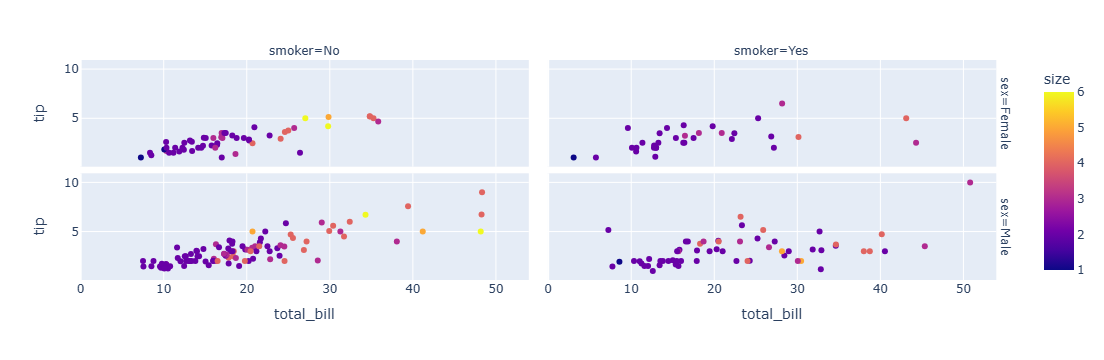

In [237]:
px.scatter(tips, x = 'total_bill', y = 'tip', facet_col='smoker', facet_row='sex', color = 'size')

In [238]:
iris.head()

sepal_length  sepal_width  petal_length  petal_width species  species_id
0           5.1          3.5           1.4          0.2  setosa           1
1           4.9          3.0           1.4          0.2  setosa           1
2           4.7          3.2           1.3          0.2  setosa           1
3           4.6          3.1           1.5          0.2  setosa           1
4           5.0          3.6           1.4          0.2  setosa           1

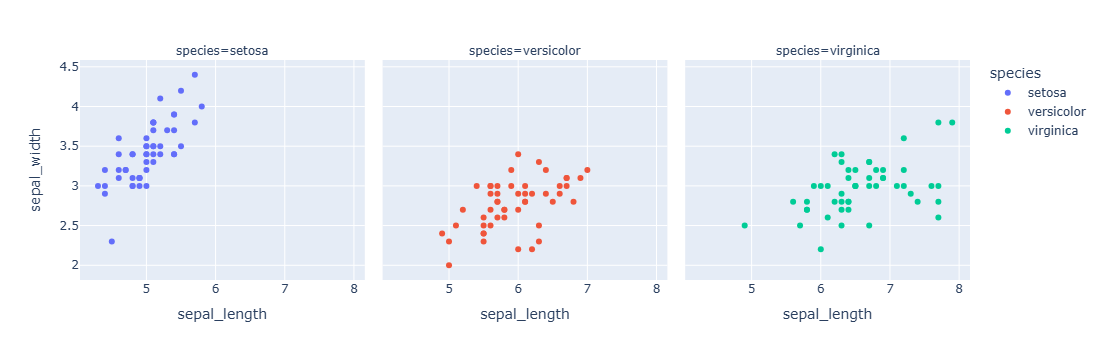

In [241]:
px.scatter(iris, x = 'sepal_length', y = 'sepal_width', facet_col='species', color='species')

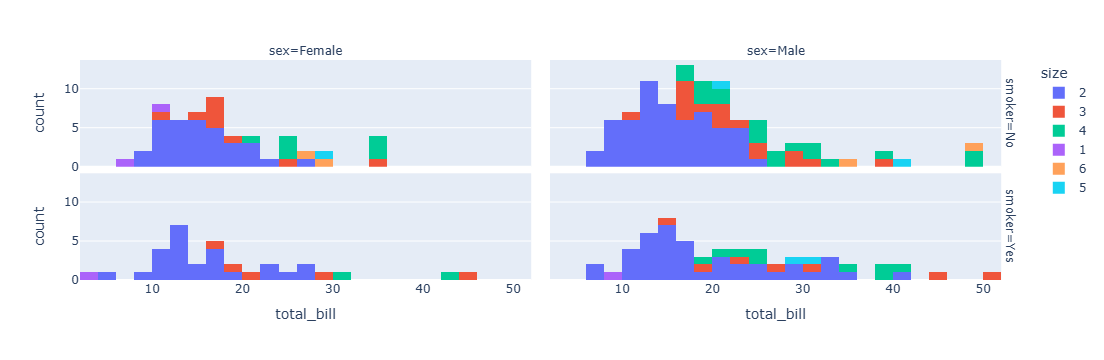

In [249]:
px.histogram(tips, x = 'total_bill', nbins = 30, facet_col='sex', facet_row='smoker', color='size')

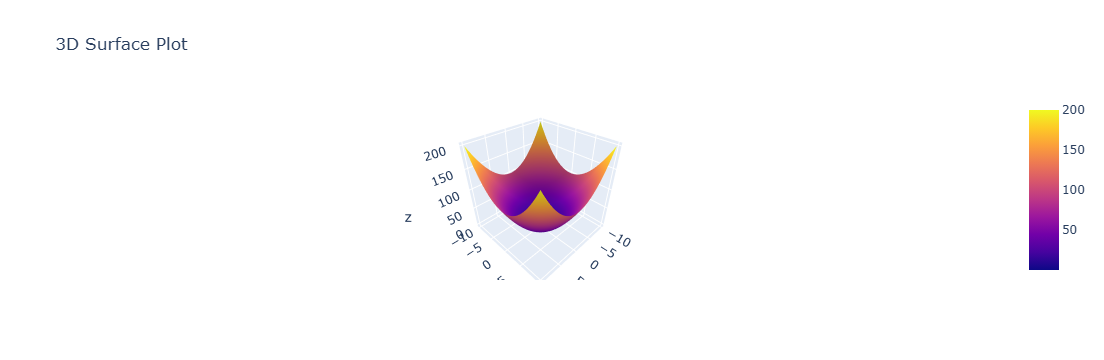

In [250]:
# 3d Surface plot
# can not be created using Plotly express
# we will use plotly graph object -> go

x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)

xx, yy = np.meshgrid(x,y)

z = xx**2 + yy**2
# z = np.sin(xx) + np.tan(yy)
# z = np.sqrt(xx**2 + yy**2)


trace = go.Surface(x=x,y=y,z=z)

data = [trace]

layout = go.Layout(title='3D Surface Plot')

fig = go.Figure(data,layout)

fig.show()